# Modelo RNN


## Inicialización y carga de datos

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
dataset = pd.read_csv('out2.csv')
dataset

,text,labels
0,my favourit food is anyth i didn t have to coo...,4
1,now if he doe off himself everyon will think h...,4
2,whi the fuck is bayless iso,0
3,to make her feel threaten,2
4,dirti southern wanker,0
...,...,...
44518,thank i wa diagnos with bp <NUMBER1> after t...,3
44519,well that make sens,3
44520,daddi issu name,4
44521,so glad i discov that subreddit a coupl month ...,3


In [ ]:
train_data, test_data = train_test_split(dataset, test_size=0.08, stratify=dataset['labels'], random_state=42)

# Subdividimos train en el propio train y datos para la validación
train_data, validation_data = train_test_split(train_data, test_size=0.12, stratify=train_data['labels'], random_state=3)

In [ ]:
train_data.head()

,text,labels
23077,happi daili peko <NUMBER3> sourc couldn’t be...,3
8803,you’d think the higher up would look at how mu...,4
4252,thi is just brother and sister but with extra ...,3
9633,you got me,4
9239,both me and my bf pee in the shower togeth hah...,3


In [ ]:
validation_data.head()

,text,labels
26726,i think i love you mate:face_with_tears_of_joy:,3
35046,you fuck moron,0
11149,those scar look fairli recent just rememb no m...,3
37215,she doesn’t deserv the hate that mug ladi and ...,3
3835,well one of our lead candid is name so it s no...,0


In [ ]:
test_data.head()

,text,labels
8886,altern between verbal abus and neglect nice wh...,4
37007,pleas no,4
2448,then you should lawyer up,4
39449,thank for share thi tool gonna be use in find ...,3
44265,mayb server relat i ve got <NUMBER1> car in ...,6


In [ ]:
train_features = train_data['text'].astype(str)
train_labels = train_data['labels']

print(len(train_features))
print(len(train_labels))
print(train_features.head(1))
print(train_labels.head(1))

validation_features = validation_data['text'].astype(str)
validation_labels = validation_data['labels']

print(len(validation_features))
print(len(validation_labels))
print(validation_features.head(1))
print(validation_labels.head(1))

test_features = test_data['text'].astype(str)
test_labels = test_data['labels']

print(len(test_features))
print(len(test_labels))
print(test_features.head(1))
print(test_labels.head(1))

36045
36045
23077    happi daili peko  <NUMBER3>  sourc couldn’t be...
Name: text, dtype: object
23077    3
Name: labels, dtype: int64
4916
4916
26726    i think i love you mate:face_with_tears_of_joy:
Name: text, dtype: object
26726    3
Name: labels, dtype: int64
3562
3562
8886    altern between verbal abus and neglect nice wh...
Name: text, dtype: object
8886    4
Name: labels, dtype: int64


In [ ]:
tf_train = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
print(tf_train)

tf_validation = tf.data.Dataset.from_tensor_slices((validation_features, validation_labels))
print(tf_validation)

tf_test = tf.data.Dataset.from_tensor_slices((test_features, test_labels))
print(tf_test)

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [ ]:
for item in tf_train.take(5):
  print(item)

(<tf.Tensor: shape=(), dtype=string, numpy=b'happi daili peko  <NUMBER3>  sourc couldn\xe2\x80\x99t be found i think it\xe2\x80\x99 from the manga'>, <tf.Tensor: shape=(), dtype=int64, numpy=3>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'you\xe2\x80\x99d think the higher up would look at how much these law suit are cost and tell their boy and girl to tone it the fuck down'>, <tf.Tensor: shape=(), dtype=int64, numpy=4>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'thi is just brother and sister but with extra step'>, <tf.Tensor: shape=(), dtype=int64, numpy=3>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'you got me'>, <tf.Tensor: shape=(), dtype=int64, numpy=4>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'both me and my bf pee in the shower togeth hahahaha'>, <tf.Tensor: shape=(), dtype=int64, numpy=3>)


In [ ]:
for example, label in tf_train.take(5):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b'happi daili peko  <NUMBER3>  sourc couldn\xe2\x80\x99t be found i think it\xe2\x80\x99 from the manga'
label:  3
text:  b'you\xe2\x80\x99d think the higher up would look at how much these law suit are cost and tell their boy and girl to tone it the fuck down'
label:  4
text:  b'thi is just brother and sister but with extra step'
label:  3
text:  b'you got me'
label:  4
text:  b'both me and my bf pee in the shower togeth hahahaha'
label:  3


In [ ]:
BUFFER_SIZE = 36200 # Match dataset size
BATCH_SIZE = 32

train_dataset = tf_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset = tf_validation.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = tf_test.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'all side' b'i hope she make enough for therapi for her kid'
 b'hey it\xe2\x80\x99 not bad though quick recoveri just follow their rule good luck']

labels:  [4 3 3]


## Inicialización del encoder

In [ ]:
# set_palabras = set(dataset['text'].join('\n'))
palabras = train_data['text'].str.split(expand=True).stack().unique()
print(palabras)
print(len(palabras))

['happi' 'daili' 'peko' ... 'dongphuongdriv' 'gratzi' 'manchildren']
17007


In [ ]:
VOCAB_SIZE = len(palabras)
#MAX_SEQ_LENGTH = 40

# Standardize = None evita que se haga preprocesado, de lo contrario se convierte a minuscula y elimina todos
# los símbolos de puntuación
encoder = tf.keras.layers.TextVectorization(standardize=None,
    max_tokens=VOCAB_SIZE)

# usamos el dataset directamente, sin el barajeo
encoder.adapt(tf_train.map(lambda text, label: text))

vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'i', 'the', 'to', 'a', 'you', 'it', 'that', 'and',
       'is', 'name', 'of', 'thi', 'in', 'for', 's', 'be', 't', 'wa'],
      dtype='<U88')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  45,  442,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   2,   92,   54,   59,  251,   15, 1262,   15,   74,  175,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [ 379,  115,   21,  131,  159,  880, 1999,   27,  630,   97,  621,
          50,  276,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]])

## Ponderación de clases

In [ ]:
# Calcular la cantidad de muestras totales
total_samples = len(train_data)

# Contar muestras por clase
class_counts = train_data['labels'].value_counts()

print(class_counts)

# Calcular los pesos de las clases
class_weights = {i: total_samples / count for i, count in enumerate(class_counts)}

print("Pesos de las clases:", class_weights)

labels
3    13827
4    11682
0     3939
6     3518
5     2112
2      502
1      465
Name: count, dtype: int64
Pesos de las clases: {0: 2.6068561510088957, 1: 3.0855161787365177, 2: 9.15079969535415, 3: 10.24587833996589, 4: 17.066761363636363, 5: 71.80278884462152, 6: 77.51612903225806}


In [ ]:
# class_counts = train_data['labels'].value_counts()
# class_weights = {i: 1.0 / count for i, count in enumerate(class_counts)}
# print(class_weights)

In [ ]:
print(class_counts)

## Modelo con una capa LSTM

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
print(sample_text)
predictions = model.predict(np.array([sample_text]).astype(object))
print(predictions[0])

The movie was cool. The animation and the graphics were out of this world. I would recommend this movie.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[0.14619763 0.14222322 0.1412782  0.14093985 0.14341868 0.1415073
 0.14443506]


In [ ]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]).astype(object))
print(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[0.14619763 0.14222322 0.1412782  0.14093985 0.14341868 0.14150728
 0.14443506]


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=15,
                    class_weight=class_weights,
                    validation_data=validation_dataset)

Epoch 1/15
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 66s 58ms/step - accuracy: 0.7163 - loss: 10.2275 - val_accuracy: 0.5718 - val_loss: 1.4862
Epoch 2/15
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 64s 57ms/step - accuracy: 0.7237 - loss: 9.6379 - val_accuracy: 0.5525 - val_loss: 1.5598
Epoch 3/15
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.7307 - loss: 9.0295 - val_accuracy: 0.5441 - val_loss: 1.5795
Epoch 4/15
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 64s 56ms/step - accuracy: 0.7410 - loss: 8.6907 - val_accuracy: 0.5533 - val_loss: 1.5614
Epoch 5/15
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 65s 58ms/step - accuracy: 0.7451 - loss: 8.2853 - val_accuracy: 0.5543 - val_loss: 1.6122
Epoch 6/15
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.7538 - loss: 7.8860 - val_accuracy: 0.5226 - val_loss: 1.8301
Epoch 7/15
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 79s 58ms/step - accuracy: 0.7573 - loss: 7.4850 - val_accuracy: 0.5539 - val_loss: 1.6781
Epoch 8/15
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.7624 

(0.0, 10.937739723920822)

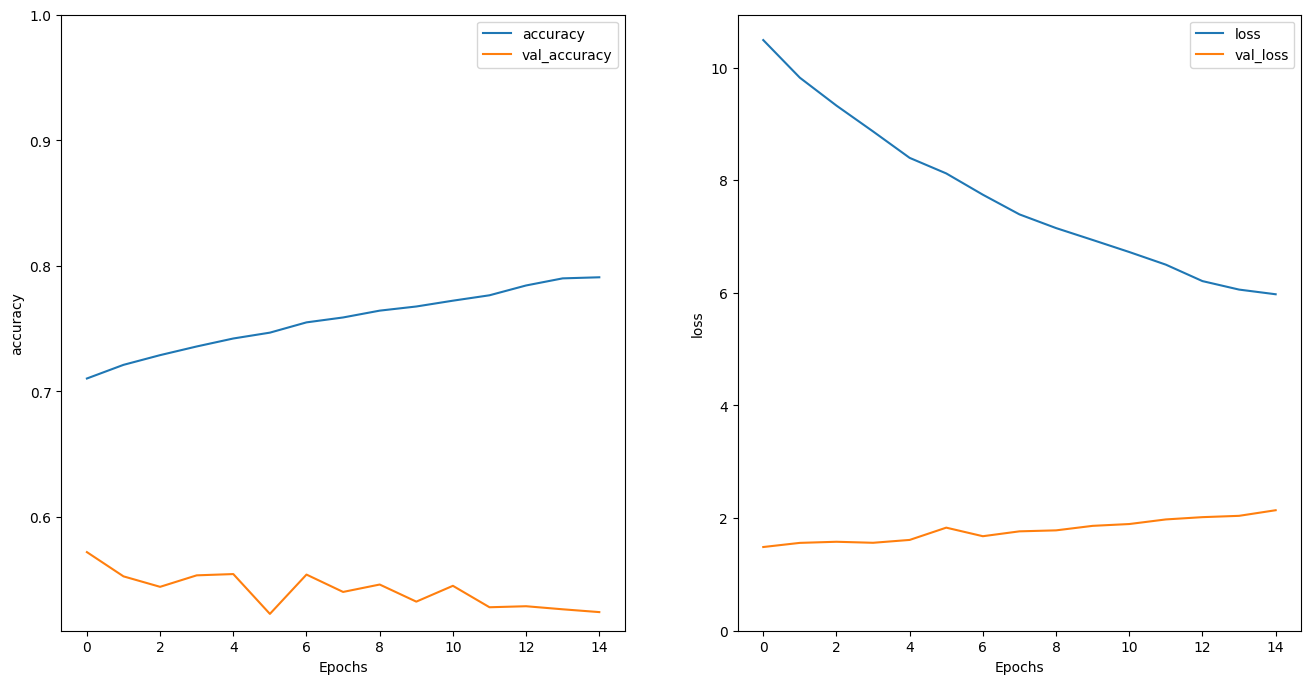

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]).astype(object))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
[[2.8699186e-02 6.6347062e-03 1.0438504e-03 1.1288814e-05 5.7485248e-03
  9.5786238e-01 1.5840331e-07]]


In [ ]:
sample_text = ('The movie was awful. The animation was crap. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]).astype(object))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[3.4801483e-02 7.2389091e-03 1.1616120e-03 1.3319001e-05 7.6171835e-03
  9.4916713e-01 3.1991078e-07]]


## Modelo ajustado con Dropout y normalización


In [ ]:
model = tf.keras.Sequential([
   encoder,
   tf.keras.layers.Embedding(
       input_dim=len(encoder.get_vocabulary()),
       output_dim=12,
       mask_zero=True),
   tf.keras.layers.Dropout(0.1),


   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(12, dropout=0.6,
                                                      recurrent_dropout=0.6,
                                                      return_sequences=False)),
   #tf.keras.layers.Dropout(0.2),
   #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, dropout=0.3,
  #                                                    recurrent_dropout=0.3, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
   tf.keras.layers.BatchNormalization(),
   #tf.keras.layers.LayerNormalization(),

   tf.keras.layers.Dropout(0.1),
   #tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.05), activation='relu'),
   #tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(7, activation='softmax')
])


In [ ]:
# Learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=5000,
    decay_rate=0.6
)
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=8e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Or 'val_accuracy' depending on what you want to monitor
    patience=3,           # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Ensures that the best model is restored
)

In [ ]:
history = model.fit(train_dataset, epochs=60,
                    class_weight=class_weights,
                    validation_data=validation_dataset,
                    callbacks=[early_stopping])

Epoch 1/60
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 53s 41ms/step - accuracy: 0.2760 - loss: 34.1930 - val_accuracy: 0.5376 - val_loss: 1.4054
Epoch 2/60
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 46s 40ms/step - accuracy: 0.4555 - loss: 23.4752 - val_accuracy: 0.5643 - val_loss: 1.3605
Epoch 3/60
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 88s 46ms/step - accuracy: 0.5054 - loss: 21.0573 - val_accuracy: 0.5507 - val_loss: 1.3710
Epoch 4/60
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.5401 - loss: 19.7561 - val_accuracy: 0.5568 - val_loss: 1.3463
Epoch 5/60
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.5597 - loss: 18.4653 - val_accuracy: 0.5547 - val_loss: 1.3565
Epoch 6/60
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.5775 - loss: 17.6665 - val_accuracy: 0.5602 - val_loss: 1.3504
Epoch 7/60
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.5842 - loss: 17.0844 - val_accuracy: 0.5692 - val_loss: 1.3093
Epoch 8/60
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5599 - loss: 1.3381
Test Loss: 1.3400102853775024
Test Accuracy: 0.55474454164505


(0.0, 31.019731163978577)

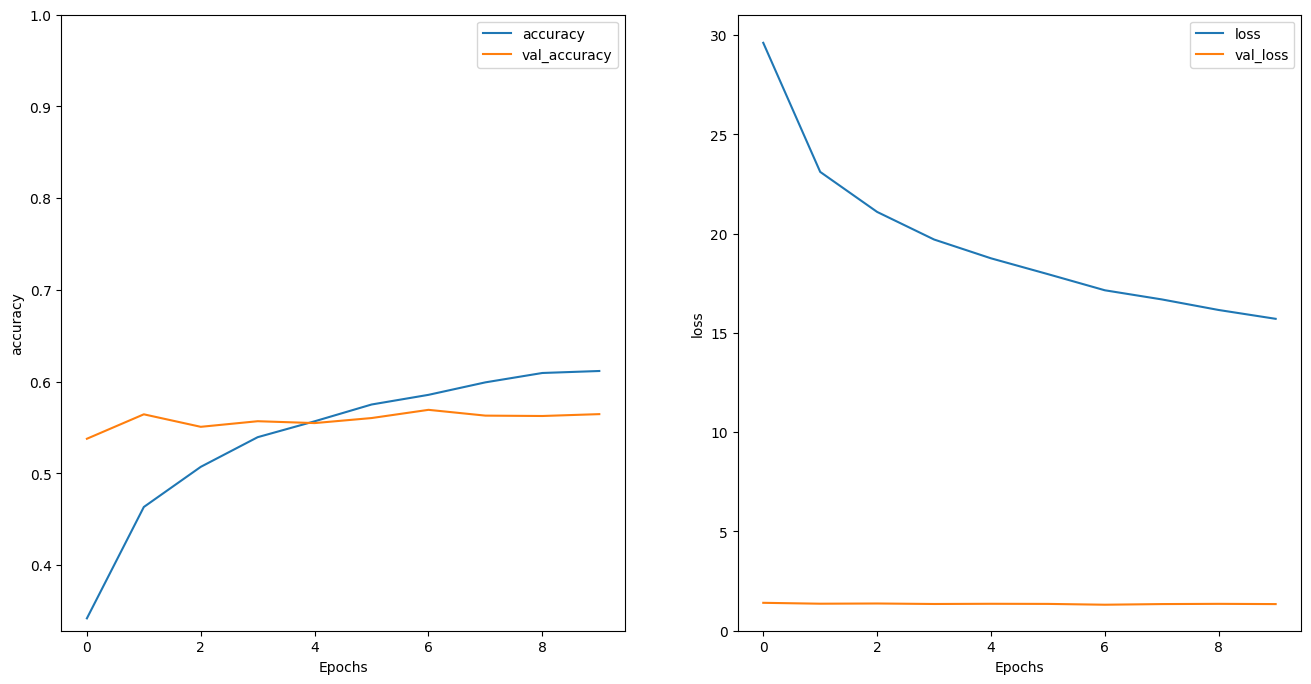

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]).astype(object))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
[[0.04471408 0.00508422 0.01303984 0.04252817 0.80181    0.0666031
  0.02622045]]


In [ ]:
sample_text = ('The movie was awful. The animation was crap.'
               'I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]).astype(object))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.03797045 0.00400295 0.00977761 0.028436   0.85678935 0.05019366
  0.01282998]]


In [ ]:
dataset_name = 'twitter_emotions_2'
saved_model_path = './{}_rnn.keras'.format(dataset_name.replace('/', '_'))

model.save(saved_model_path, include_optimizer=False)

## Recarga del modelo

In [ ]:
reloaded_model = tf.keras.models.load_model('/content/twitter_emotions_2_rnn.keras')

In [ ]:
reloaded_model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization_1                 │ (None, None)                │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_31 (Embedding)             │ (None, None, 12)            │         204,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, None, 12)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_31 (Bidirectional)     │ (None, 24)                  │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 7)                   │             175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620,170 (2.37 MB)

 Trainable params: 206,707 (807.45 KB)

 Non-trainable params: 48 (192.00 B)

 Optimizer params: 413,415 (1.58 MB)

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = reloaded_model.predict(np.array([sample_text]).astype(object))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
[[0.04471408 0.00508422 0.01303984 0.04252817 0.80181    0.0666031
  0.02622045]]
